In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf

from core.functions import heatmap_corr
from core.functions import logistic_reg

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/raw/motor_vehicle_insurance_data.csv', sep=';', parse_dates=['Date_start_contract', 'Date_last_renewal',
        'Date_next_renewal','Date_birth', 'Date_driving_licence', 'Date_lapse'], dayfirst=True)
display(df.head())
display(df.shape)

C:\Users\CLopes\AppData\Local\Temp\ipykernel_11516\3081844874.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/motor_vehicle_insurance_data.csv', sep=';', parse_dates=['Date_start_contract', 'Date_last_renewal',


,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Date_lapse,Payment,Premium,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,2015-11-05,2015-11-05,2016-11-05,1956-04-15,1976-03-20,0,4,1,2,1,0,NaT,0,222.52,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190
1,1,2015-11-05,2016-11-05,2017-11-05,1956-04-15,1976-03-20,0,4,1,2,1,0,NaT,0,213.78,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190
2,1,2015-11-05,2017-11-05,2018-11-05,1956-04-15,1976-03-20,0,4,2,2,1,0,NaT,0,214.84,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190
3,1,2015-11-05,2018-11-05,2019-11-05,1956-04-15,1976-03-20,0,4,2,2,1,0,NaT,0,216.99,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190
4,2,2017-09-26,2017-09-26,2018-09-26,1956-04-15,1976-03-20,0,4,2,2,1,0,NaT,1,213.70,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190


(105555, 30)

In [3]:
display(df.dtypes)

ID                               int64
Date_start_contract     datetime64[ns]
Date_last_renewal       datetime64[ns]
Date_next_renewal       datetime64[ns]
Date_birth              datetime64[ns]
Date_driving_licence    datetime64[ns]
Distribution_channel            object
Seniority                        int64
Policies_in_force                int64
Max_policies                     int64
Max_products                     int64
Lapse                            int64
Date_lapse              datetime64[ns]
Payment                          int64
Premium                        float64
Cost_claims_year               float64
N_claims_year                    int64
N_claims_history                 int64
R_Claims_history               float64
Type_risk                        int64
Area                             int64
Second_driver                    int64
Year_matriculation               int64
Power                            int64
Cylinder_capacity                int64
Value_vehicle            

In [4]:
for cat_col in df.columns:
    if df[cat_col].dtype == 'object':
        df[cat_col] = df[cat_col].astype('category')

display(df.dtypes, df.isna().sum())

ID                               int64
Date_start_contract     datetime64[ns]
Date_last_renewal       datetime64[ns]
Date_next_renewal       datetime64[ns]
Date_birth              datetime64[ns]
Date_driving_licence    datetime64[ns]
Distribution_channel          category
Seniority                        int64
Policies_in_force                int64
Max_policies                     int64
Max_products                     int64
Lapse                            int64
Date_lapse              datetime64[ns]
Payment                          int64
Premium                        float64
Cost_claims_year               float64
N_claims_year                    int64
N_claims_history                 int64
R_Claims_history               float64
Type_risk                        int64
Area                             int64
Second_driver                    int64
Year_matriculation               int64
Power                            int64
Cylinder_capacity                int64
Value_vehicle            

ID                          0
Date_start_contract         0
Date_last_renewal           0
Date_next_renewal           0
Date_birth                  0
Date_driving_licence        0
Distribution_channel        0
Seniority                   0
Policies_in_force           0
Max_policies                0
Max_products                0
Lapse                       0
Date_lapse              70408
Payment                     0
Premium                     0
Cost_claims_year            0
N_claims_year               0
N_claims_history            0
R_Claims_history            0
Type_risk                   0
Area                        0
Second_driver               0
Year_matriculation          0
Power                       0
Cylinder_capacity           0
Value_vehicle               0
N_doors                     0
Type_fuel                1764
Length                  10329
Weight                      0
dtype: int64

In [5]:
df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Date_lapse,Payment,Premium,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,2015-11-05,2015-11-05,2016-11-05,1956-04-15,1976-03-20,0,4,1,2,1,0,NaT,0,222.52,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190
1,1,2015-11-05,2016-11-05,2017-11-05,1956-04-15,1976-03-20,0,4,1,2,1,0,NaT,0,213.78,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190
2,1,2015-11-05,2017-11-05,2018-11-05,1956-04-15,1976-03-20,0,4,2,2,1,0,NaT,0,214.84,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190
3,1,2015-11-05,2018-11-05,2019-11-05,1956-04-15,1976-03-20,0,4,2,2,1,0,NaT,0,216.99,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190
4,2,2017-09-26,2017-09-26,2018-09-26,1956-04-15,1976-03-20,0,4,2,2,1,0,NaT,1,213.70,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190


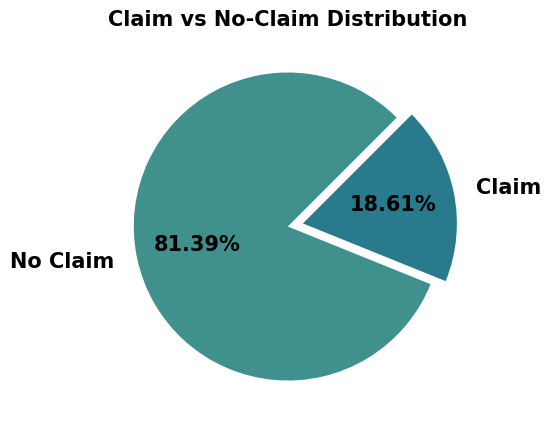

In [6]:
df['Claimed'] = (df['N_claims_year'] > 0).astype('int64')

colors = sns.color_palette("crest")[2:4]
fig, ax = plt.subplots(figsize=(6, 5))
df['Claimed'].value_counts().plot(kind = 'pie', ax=ax, labels = ['No Claim', 'Claim'], colors = colors,
                                   autopct='%1.2f%%', # inserir os porcentuais na 'fatia da pizza'
                                   explode = [0, 0.1], labeldistance=1.15, startangle=45,
                                   textprops={'fontsize':15, 'fontweight': 'bold'})
ax.set_title('Claim vs No-Claim Distribution', fontsize=15, fontweight='bold')
ax.set_ylabel('');
fig.savefig('graph_pie_claim_perc.png')  

In [7]:
## Correct a probable mistyping in the ‘Distribution_channel’ column: 00/01/1900 --> 0
df['Distribution_channel'] = df['Distribution_channel'].astype(str).str.strip()
df['Distribution_channel'] = df['Distribution_channel'].replace('00/01/1900', 0)
df['Distribution_channel'] = pd.to_numeric(df['Distribution_channel'], errors='coerce')

In [8]:
df.dtypes

ID                               int64
Date_start_contract     datetime64[ns]
Date_last_renewal       datetime64[ns]
Date_next_renewal       datetime64[ns]
Date_birth              datetime64[ns]
Date_driving_licence    datetime64[ns]
Distribution_channel             int64
Seniority                        int64
Policies_in_force                int64
Max_policies                     int64
Max_products                     int64
Lapse                            int64
Date_lapse              datetime64[ns]
Payment                          int64
Premium                        float64
Cost_claims_year               float64
N_claims_year                    int64
N_claims_history                 int64
R_Claims_history               float64
Type_risk                        int64
Area                             int64
Second_driver                    int64
Year_matriculation               int64
Power                            int64
Cylinder_capacity                int64
Value_vehicle            

In [9]:
# Cria uma coluna 'Age' vazia antes do loop (logo após 'Date_birth')
pos = df.columns.get_loc('Date_birth')
df.insert(pos + 1, 'Age', np.nan)
# The age of the policyholder on the date of contract renewal
for row in range(df.shape[0]):
    birth = df.loc[row, 'Date_birth']
    ref = df.loc[row, 'Date_last_renewal']
    age = ref.year - birth.year
# If the person has not had birthday yet this year, subtract one year.
    if (birth.month, birth.day) > (ref.month, ref.day):
        age = age - 1
    df.loc[row, 'Age'] = age

In [10]:
time_drv_license = df['Date_last_renewal'].dt.year - df['Date_driving_licence'].dt.year
not_yet_birthday = (df['Date_last_renewal'].dt.month < df['Date_driving_licence'].dt.month) | \
((df['Date_last_renewal'].dt.month == df['Date_driving_licence'].dt.month) & (df['Date_last_renewal'].dt.day < df['Date_driving_licence'].dt.day))
time_drv_license = time_drv_license - not_yet_birthday.astype(int)
# Encontra a posição de Date_driving_licence
pos = df.columns.get_loc('Date_driving_licence')
# Insere a nova coluna ao lado da coluna Date_driving_licence
df.insert(pos + 1, 'Time_drv_license', time_drv_license)

In [11]:
df['Age'] = df['Age'].astype('int64')
df['Time_drv_license'] = df['Time_drv_license'].clip(lower=0)

In [12]:
df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Age,Date_driving_licence,Time_drv_license,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Date_lapse,Payment,Premium,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Claimed
0,1,2015-11-05,2015-11-05,2016-11-05,1956-04-15,59,1976-03-20,39,0,4,1,2,1,0,NaT,0,222.52,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190,0
1,1,2015-11-05,2016-11-05,2017-11-05,1956-04-15,60,1976-03-20,40,0,4,1,2,1,0,NaT,0,213.78,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190,0
2,1,2015-11-05,2017-11-05,2018-11-05,1956-04-15,61,1976-03-20,41,0,4,2,2,1,0,NaT,0,214.84,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190,0
3,1,2015-11-05,2018-11-05,2019-11-05,1956-04-15,62,1976-03-20,42,0,4,2,2,1,0,NaT,0,216.99,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190,0
4,2,2017-09-26,2017-09-26,2018-09-26,1956-04-15,61,1976-03-20,41,0,4,2,2,1,0,NaT,1,213.70,0.0,0,0,0.0,1,0,0,2004,80,599,7068.0,0,P,NaN,190,0


In [13]:
df_int = df.select_dtypes(include = 'int64').copy()
df_float = df.select_dtypes(include = 'float64').copy()
df_float['Claimed'] = df_int['Claimed']

In [14]:
display(df_int.shape)
df_int.describe()

(105555, 21)

,ID,Age,Time_drv_license,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,N_claims_year,N_claims_history,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,N_doors,Weight,Claimed
count,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000
mean,26271.286789,46.827275,24.278405,0.451310,6.696604,1.455649,1.837232,1.065842,0.221837,0.319180,0.394695,2.751760,2.721804,0.273895,0.123708,2004.728038,92.682611,1617.759367,4.067898,1191.262422,0.186121
std,15388.309324,12.839834,12.476962,0.497626,6.263911,0.928427,1.155536,0.267807,0.464858,0.466161,1.105018,3.881621,0.614835,0.445958,0.329250,6.767037,37.012645,604.697382,1.511839,458.081834,0.389206
min,1.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1950.000000,0.000000,49.000000,0.000000,43.000000,0.000000
25%,12925.000000,37.000000,14.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2001.000000,75.000000,1390.000000,3.000000,1043.000000,0.000000
50%,26082.000000,46.000000,23.000000,0.000000,4.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2005.000000,90.000000,1598.000000,5.000000,1205.000000,0.000000
75%,39754.000000,56.000000,34.000000,1.000000,9.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,4.000000,3.000000,1.000000,0.000000,2008.000000,110.000000,1910.000000,5.000000,1388.000000,0.000000
max,53502.000000,98.000000,74.000000,1.000000,40.000000,17.000000,17.000000,4.000000,7.000000,1.000000,25.000000,52.000000,4.000000,1.000000,1.000000,2018.000000,580.000000,7480.000000,6.000000,7300.000000,1.000000


In [15]:
df[df['N_claims_year'] == 25]

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Age,Date_driving_licence,Time_drv_license,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Date_lapse,Payment,Premium,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Claimed
45125,21987,2014-12-19,2015-12-19,2016-12-19,1972-06-06,43,2002-04-03,13,0,12,4,6,2,0,NaT,0,414.85,353.28,25,52,2.78,2,0,0,2001,116,2286,25908.6,2,D,5.899,1609,1


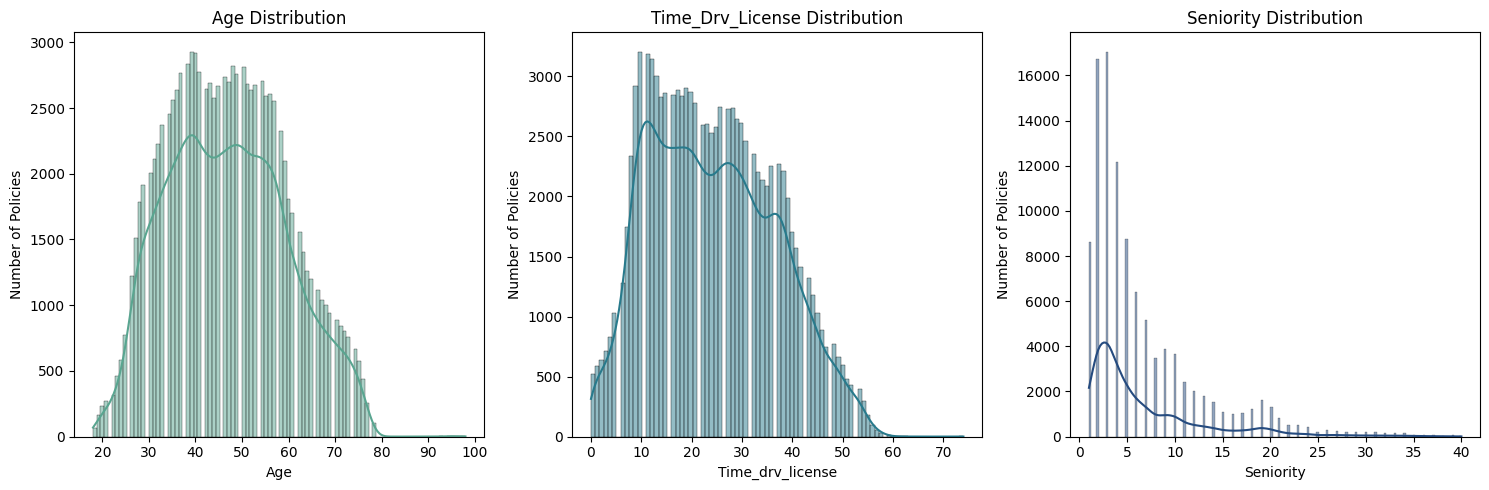

In [16]:
fig, ax = plt.subplots(ncols = 3, figsize=(15, 5))

cols = ['Age', 'Time_drv_license', 'Seniority']

for (i, col) in enumerate(cols):
    sns.histplot(df_int[col], kde = True, ax=ax[i], color=sns.color_palette("crest")[2*i+1])
    ax[i].set(title = '{} Distribution'.format(col).title(), xlabel = col, ylabel = 'Number of Policies')

plt.tight_layout()
fig.savefig('graph_overview_continous.png')

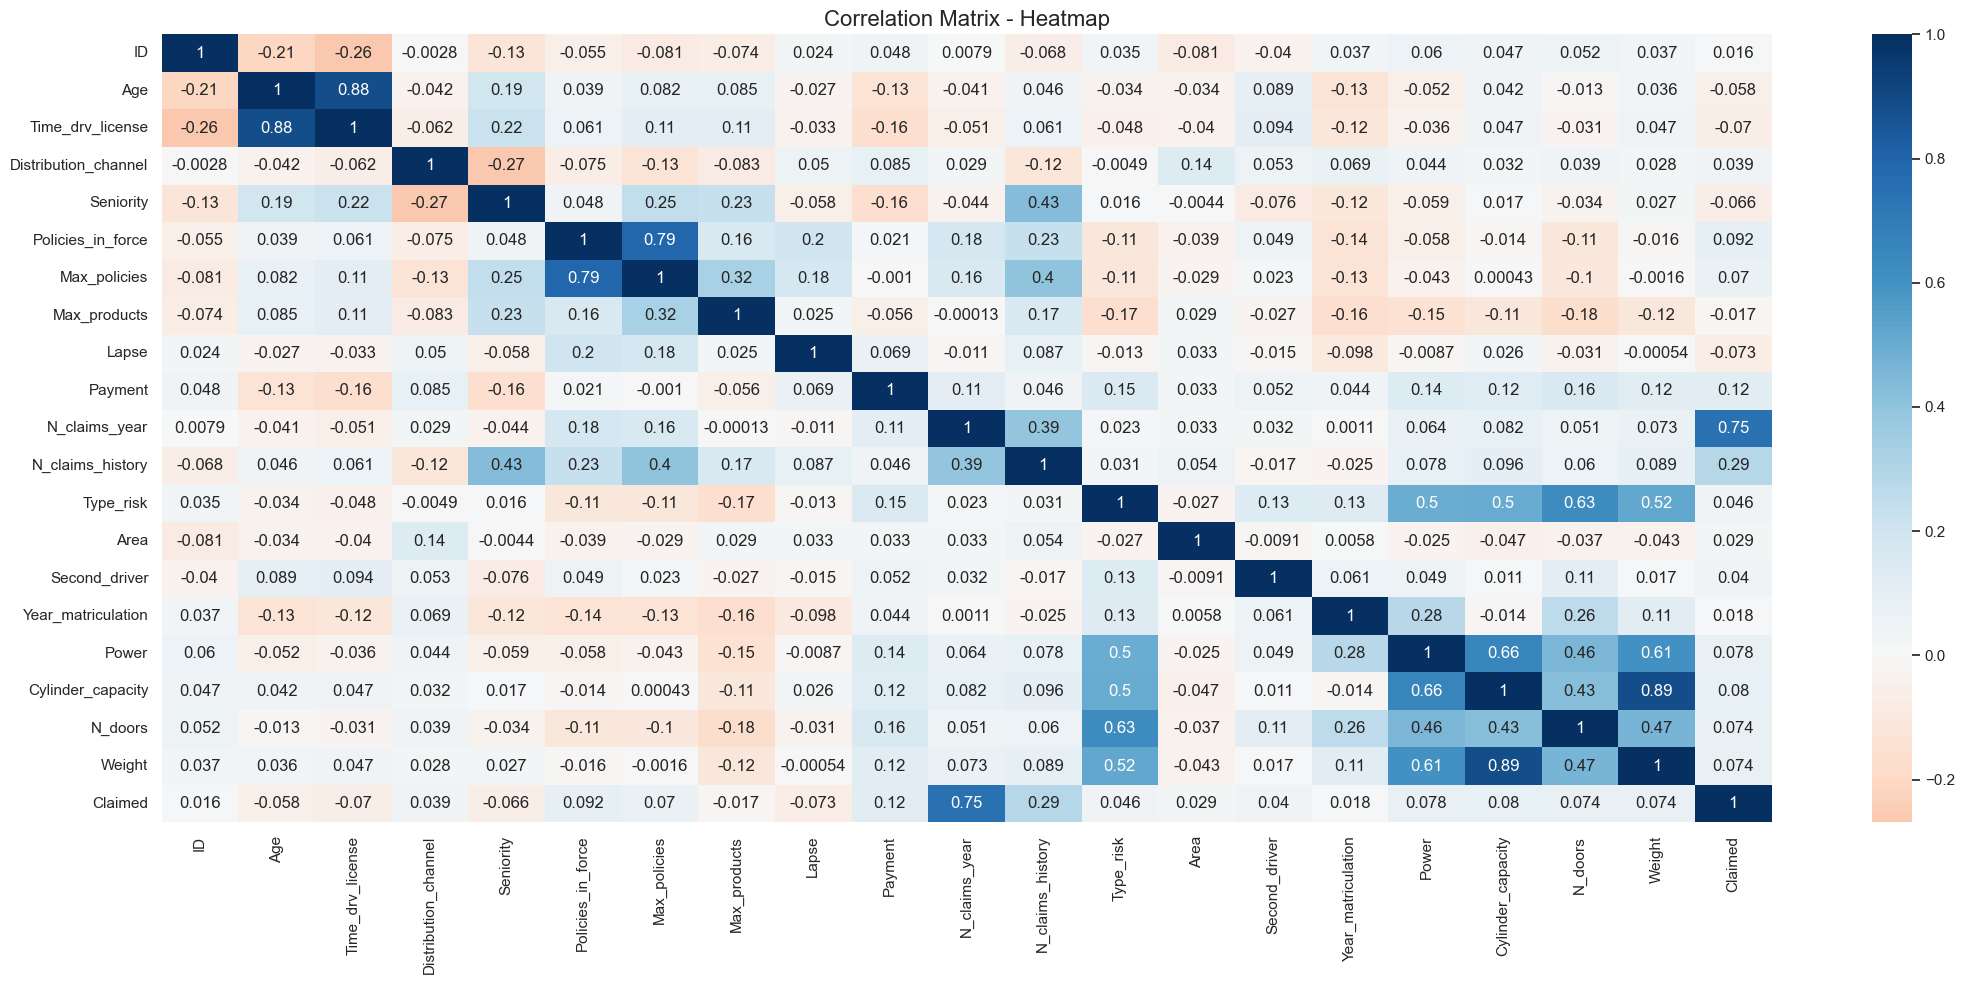

In [17]:
heatmap_corr(df_int)

In [18]:
correlacoes = df_int.corrwith(df_int['Claimed']).sort_values(ascending=False)

display(correlacoes)

Claimed                 1.000000
N_claims_year           0.746924
N_claims_history        0.289861
Payment                 0.116151
Policies_in_force       0.092033
Cylinder_capacity       0.080067
Power                   0.077809
N_doors                 0.074257
Weight                  0.073740
Max_policies            0.070478
Type_risk               0.046140
Second_driver           0.039673
Distribution_channel    0.039356
Area                    0.028604
Year_matriculation      0.018388
ID                      0.016338
Max_products           -0.016955
Age                    -0.057661
Seniority              -0.065927
Time_drv_license       -0.069789
Lapse                  -0.073372
dtype: float64

In [19]:
# Statistical significance test (ANOVA/t-test)
from scipy.stats import ttest_ind  

claim0 = df_int[df_int['Claimed'] == 0]
claim1 = df_int[df_int['Claimed'] == 1]

ttest_results = {}
for col in df_int.columns:
    if col != 'Claimed':
        stat, pval = ttest_ind(claim0[col], claim1[col], equal_var=False)
        ttest_results[col] = pval

pd.Series(ttest_results).sort_values()

N_claims_year            0.000000e+00
N_claims_history         0.000000e+00
Payment                 6.612136e-278
Cylinder_capacity       1.378841e-203
Weight                  3.242782e-197
N_doors                 5.924631e-182
Power                   4.134523e-166
Policies_in_force       1.159891e-140
Lapse                   3.647776e-134
Seniority               8.386605e-126
Time_drv_license        9.629334e-118
Max_policies             5.511134e-89
Age                      1.294381e-81
Type_risk                2.082007e-70
Distribution_channel     4.310522e-37
Second_driver            1.879750e-33
Area                     9.976266e-20
Year_matriculation       7.995420e-12
Max_products             5.105464e-09
ID                       7.636086e-08
dtype: float64

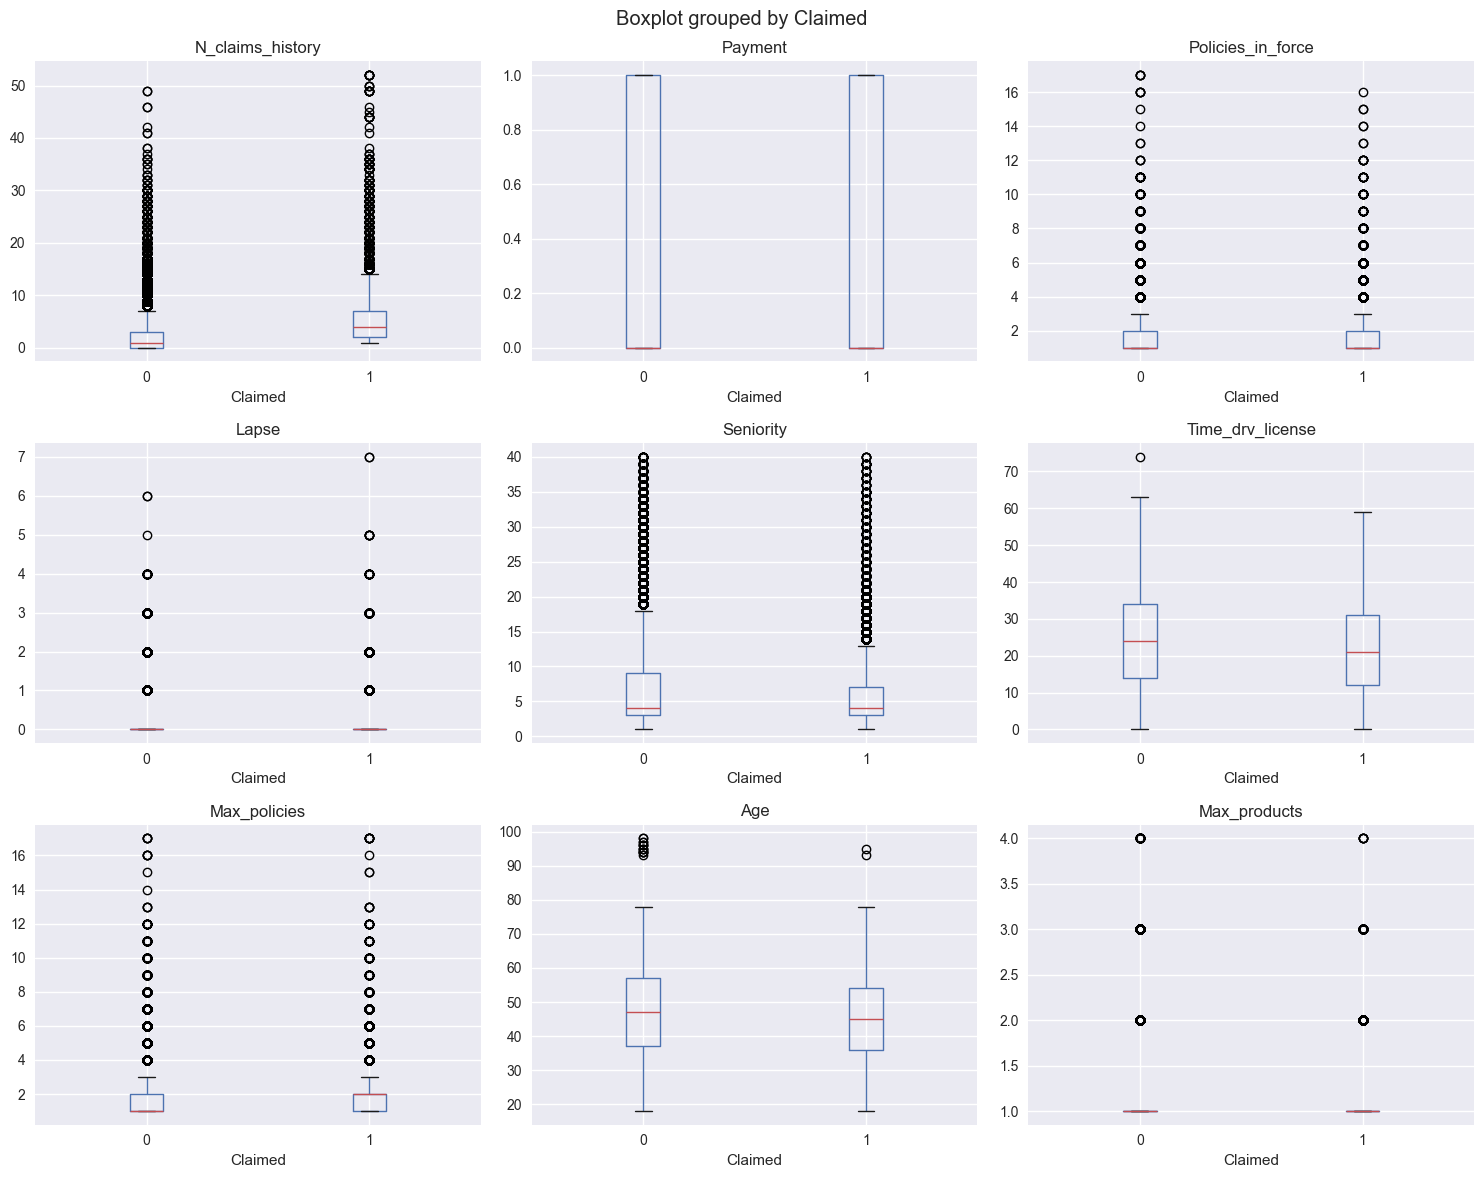

In [20]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(15, 12))

cols_int = ['N_claims_history','Payment', 'Policies_in_force', 'Lapse', 'Seniority', 'Time_drv_license', 'Max_policies', 'Age', 'Max_products']

ax = ax.flatten() # achata o array ax, transforma o array 2D (2 linhas x 3 colunas) em um array 1D - vetor (6 itens).

for i, col in enumerate(cols_int):
    df_int.boxplot(column=col, by='Claimed', ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('Claimed')
    
plt.tight_layout()

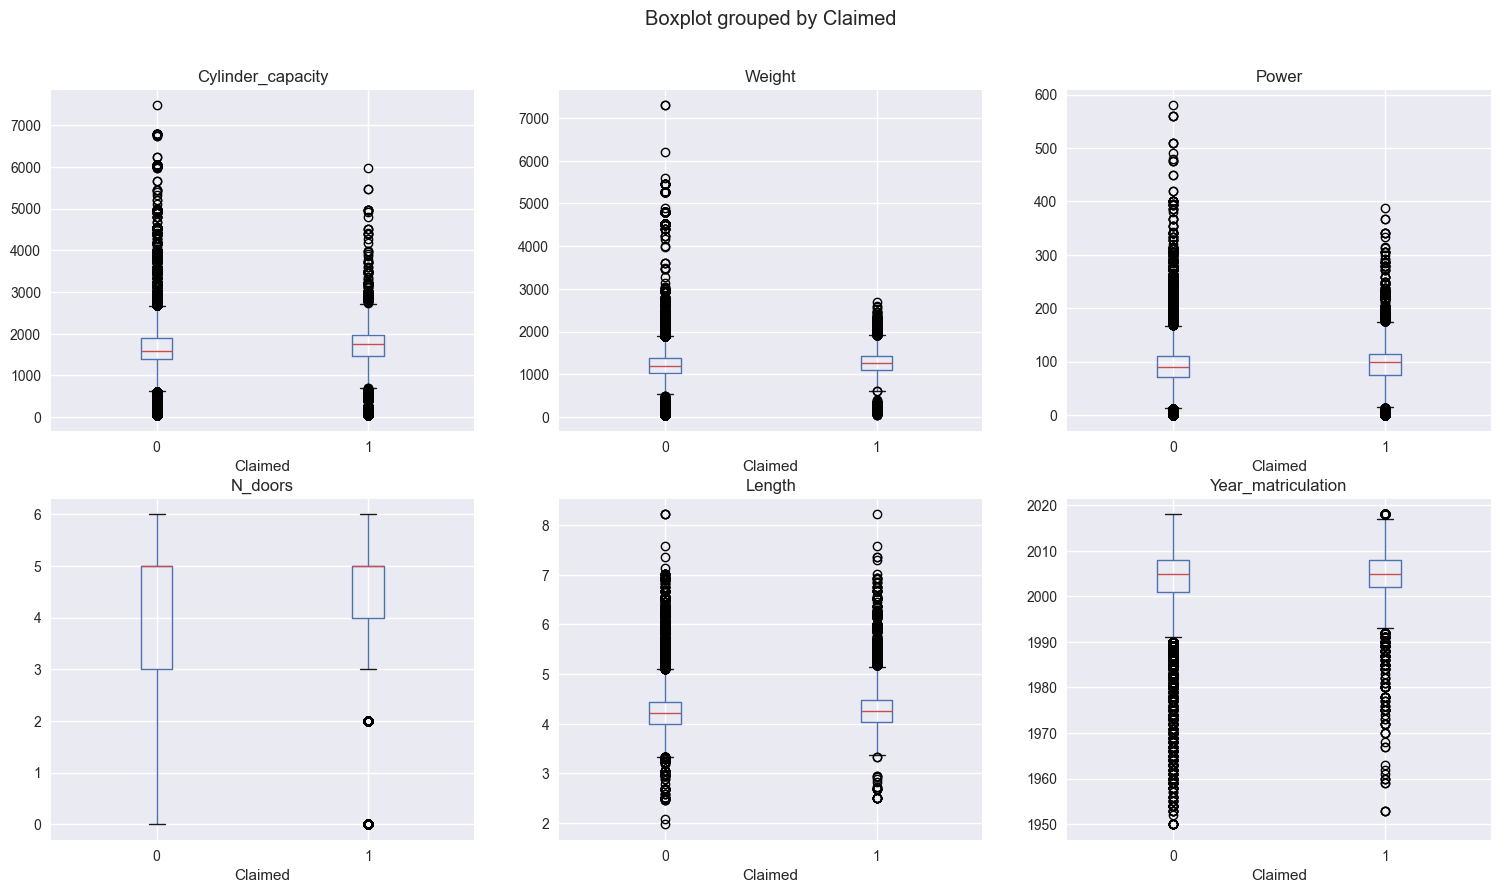

In [21]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(18, 10))
ax = ax.flatten()

cols = ['Cylinder_capacity', 'Weight', 'Power', 'N_doors', 'Length', 'Year_matriculation']

for i, col in enumerate(cols):
    df.boxplot(column=col, by='Claimed', ax=ax[i])
    ax[i].set_title(col)

C:\Users\CLopes\AppData\Local\Temp\ipykernel_11516\397008955.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2*i + 1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[2*i + 1].get_yticks()])
C:\Users\CLopes\AppData\Local\Temp\ipykernel_11516\397008955.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2*i + 1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[2*i + 1].get_yticks()])
C:\Users\CLopes\AppData\Local\Temp\ipykernel_11516\397008955.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2*i + 1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[2*i + 1].get_yticks()])


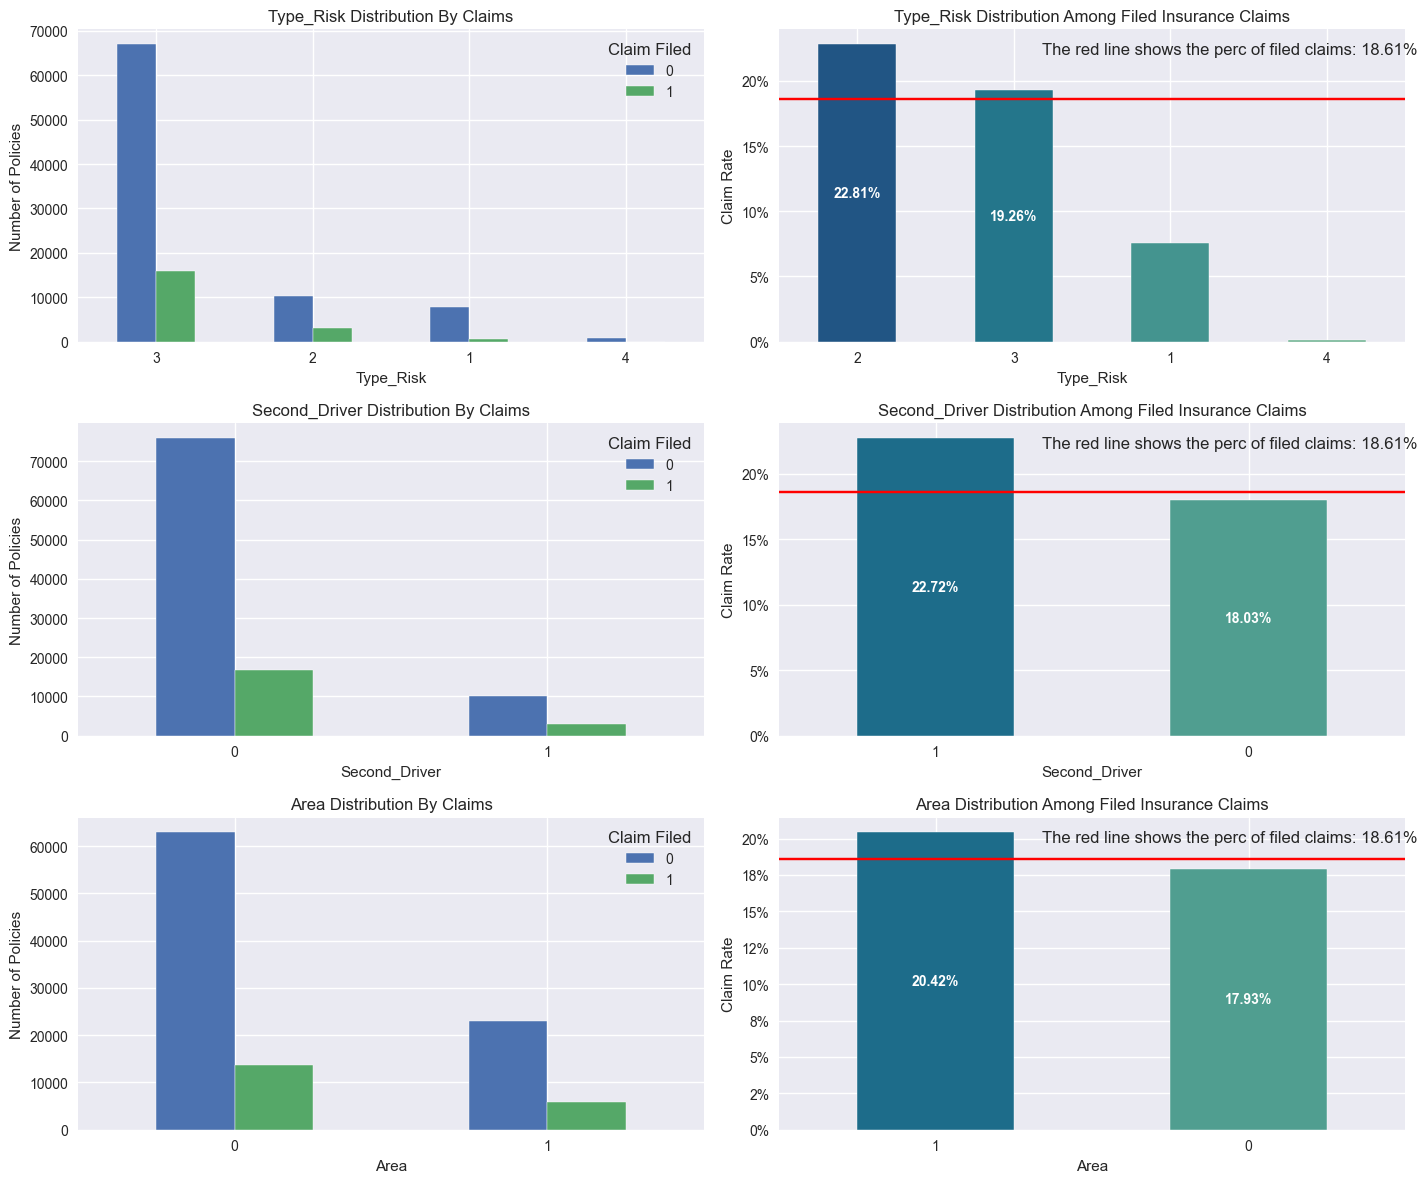

In [22]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(15, 12))
ax = ax.flatten()

cols = ['Type_risk', 'Second_driver', 'Area']

for (i, col) in enumerate(cols):
    var_ct = pd.crosstab(index = df_int[col], columns = df_int['Claimed'])
    var_ct = var_ct.sort_values(by=1, ascending=False)
    var_ct.plot(kind = 'bar', ax = ax[2*i])
    ax[2*i].set(title = '{} Distribution by Claims'.format(col).title(), xlabel = col.title(), ylabel = 'Number of Policies')
    ax[2*i].legend(title='Claim Filed')
    ax[2*i].xaxis.set_tick_params(labelrotation=0);
    
    colors = sns.color_palette('crest', n_colors=len(df_int[col].unique()))[::-1] # Paleta invertida: mais escuro = maior incidência
    df_int.groupby(col)['Claimed'].mean().sort_values(ascending=False).plot(kind = 'bar', color = colors, ax = ax[2*i + 1])
    ax[2*i + 1].set(title = '{} Distribution Among Filed Insurance Claims'.format(col).title(), xlabel = col.title(), ylabel = 'Claim Rate')
    ax[2*i + 1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[2*i + 1].get_yticks()])
    ax[2*i + 1].xaxis.set_tick_params(labelrotation=0)
    ax[2*i + 1].axhline(color='red', y = df_int['Claimed'].mean());
    ax[2*i + 1].text(transform=ax[2*i + 1].transAxes, 
                     s = 'The red line shows the perc of filed claims: {}%'.format(round(df_int['Claimed'].mean()*100, 2)), x =0.42, y=0.92)
    
    for j, p in enumerate(ax[2*i + 1].patches):
        if j < 2:
            height = p.get_height()
            ax[2*i + 1].text(p.get_x() + p.get_width()/2,  # centro da barra
                             height/2,                      # posição vertical (meio da barra)
                             f'{height*100:.2f}%',          # formato percentual
                             ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    
plt.tight_layout()

In [23]:
df_int[df_int['Claimed'] ==1].describe()

,ID,Age,Time_drv_license,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,N_claims_year,N_claims_history,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,N_doors,Weight,Claimed
count,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.0
mean,26797.021378,45.279090,22.457549,0.492263,5.833045,1.634328,2.007533,1.056347,0.150514,0.432404,2.120635,5.104551,2.781126,0.300570,0.151023,2004.988242,98.704876,1719.004123,4.302657,1261.898605,1.0
std,15132.943260,12.446063,12.137702,0.499953,5.391945,1.137550,1.362944,0.247628,0.442346,0.495422,1.703112,4.933001,0.486459,0.458518,0.358081,5.630672,32.911411,483.710106,1.177986,331.930404,0.0
min,7.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1953.000000,0.000000,49.000000,0.000000,55.000000,1.0
25%,14019.750000,36.000000,12.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,2002.000000,75.000000,1461.000000,4.000000,1095.000000,1.0
50%,26623.000000,45.000000,21.000000,0.000000,4.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,4.000000,3.000000,0.000000,0.000000,2005.000000,100.000000,1753.000000,5.000000,1259.000000,1.0
75%,39499.750000,54.000000,31.000000,1.000000,7.000000,2.000000,2.000000,1.000000,0.000000,1.000000,3.000000,7.000000,3.000000,1.000000,0.000000,2008.000000,115.000000,1974.000000,5.000000,1422.000000,1.0
max,53459.000000,95.000000,59.000000,1.000000,40.000000,16.000000,17.000000,4.000000,7.000000,1.000000,25.000000,52.000000,4.000000,1.000000,1.000000,2018.000000,388.000000,5967.000000,6.000000,2688.000000,1.0


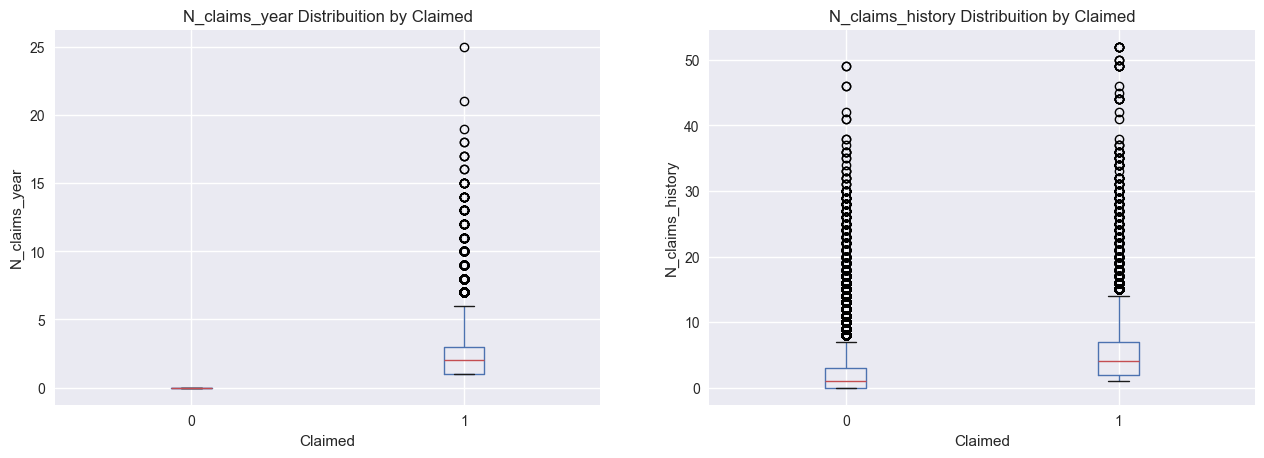

In [24]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(ncols = 2, figsize=(15, 5))

df_int.boxplot(column='N_claims_year', by='Claimed', ax=ax[0])
df_int.boxplot(column='N_claims_history', by='Claimed', ax=ax[1])
plt.suptitle('')
ax[0].set_title('N_claims_year Distribuition by Claimed')
ax[0].set_ylabel('N_claims_year')
ax[1].set_title('N_claims_history Distribuition by Claimed')
ax[1].set_ylabel('N_claims_history');

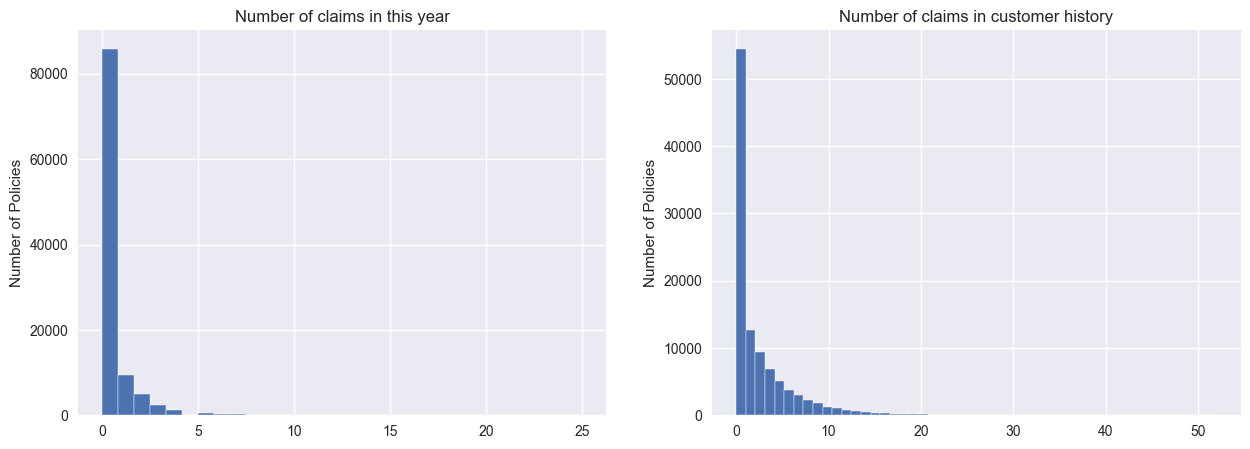

In [25]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(ncols = 2, figsize=(15, 5))

df_int['N_claims_year'].plot(kind = 'hist', bins=30, ax=ax[0])
df_int['N_claims_history'].plot(kind = 'hist', bins=50, ax=ax[1])
ax[0].set_title('Number of claims in this year')
ax[0].set_ylabel('Number of Policies')
ax[1].set_title('Number of claims in customer history')
ax[1].set_ylabel('Number of Policies');

In [26]:
display(df_float.describe())
df_float.head()

,Premium,Cost_claims_year,R_Claims_history,Value_vehicle,Length,Claimed
count,105555.000000,105555.000000,105555.000000,105555.000000,95226.000000,105555.000000
mean,315.892557,153.557305,0.425194,18413.657243,4.252007,0.186121
std,140.927969,1477.112362,0.714883,9135.074235,0.393220,0.389206
min,40.140000,0.000000,0.000000,270.460000,1.978000,0.000000
25%,241.610000,0.000000,0.000000,13127.210000,3.999000,0.000000
50%,292.280000,0.000000,0.080000,17608.770000,4.230000,0.000000
75%,361.640000,0.000000,0.590000,22595.000000,4.443000,0.000000
max,2993.340000,260853.240000,26.070000,220675.800000,8.218000,1.000000


,Premium,Cost_claims_year,R_Claims_history,Value_vehicle,Length,Claimed
0,222.52,0.0,0.0,7068.0,NaN,0
1,213.78,0.0,0.0,7068.0,NaN,0
2,214.84,0.0,0.0,7068.0,NaN,0
3,216.99,0.0,0.0,7068.0,NaN,0
4,213.70,0.0,0.0,7068.0,NaN,0


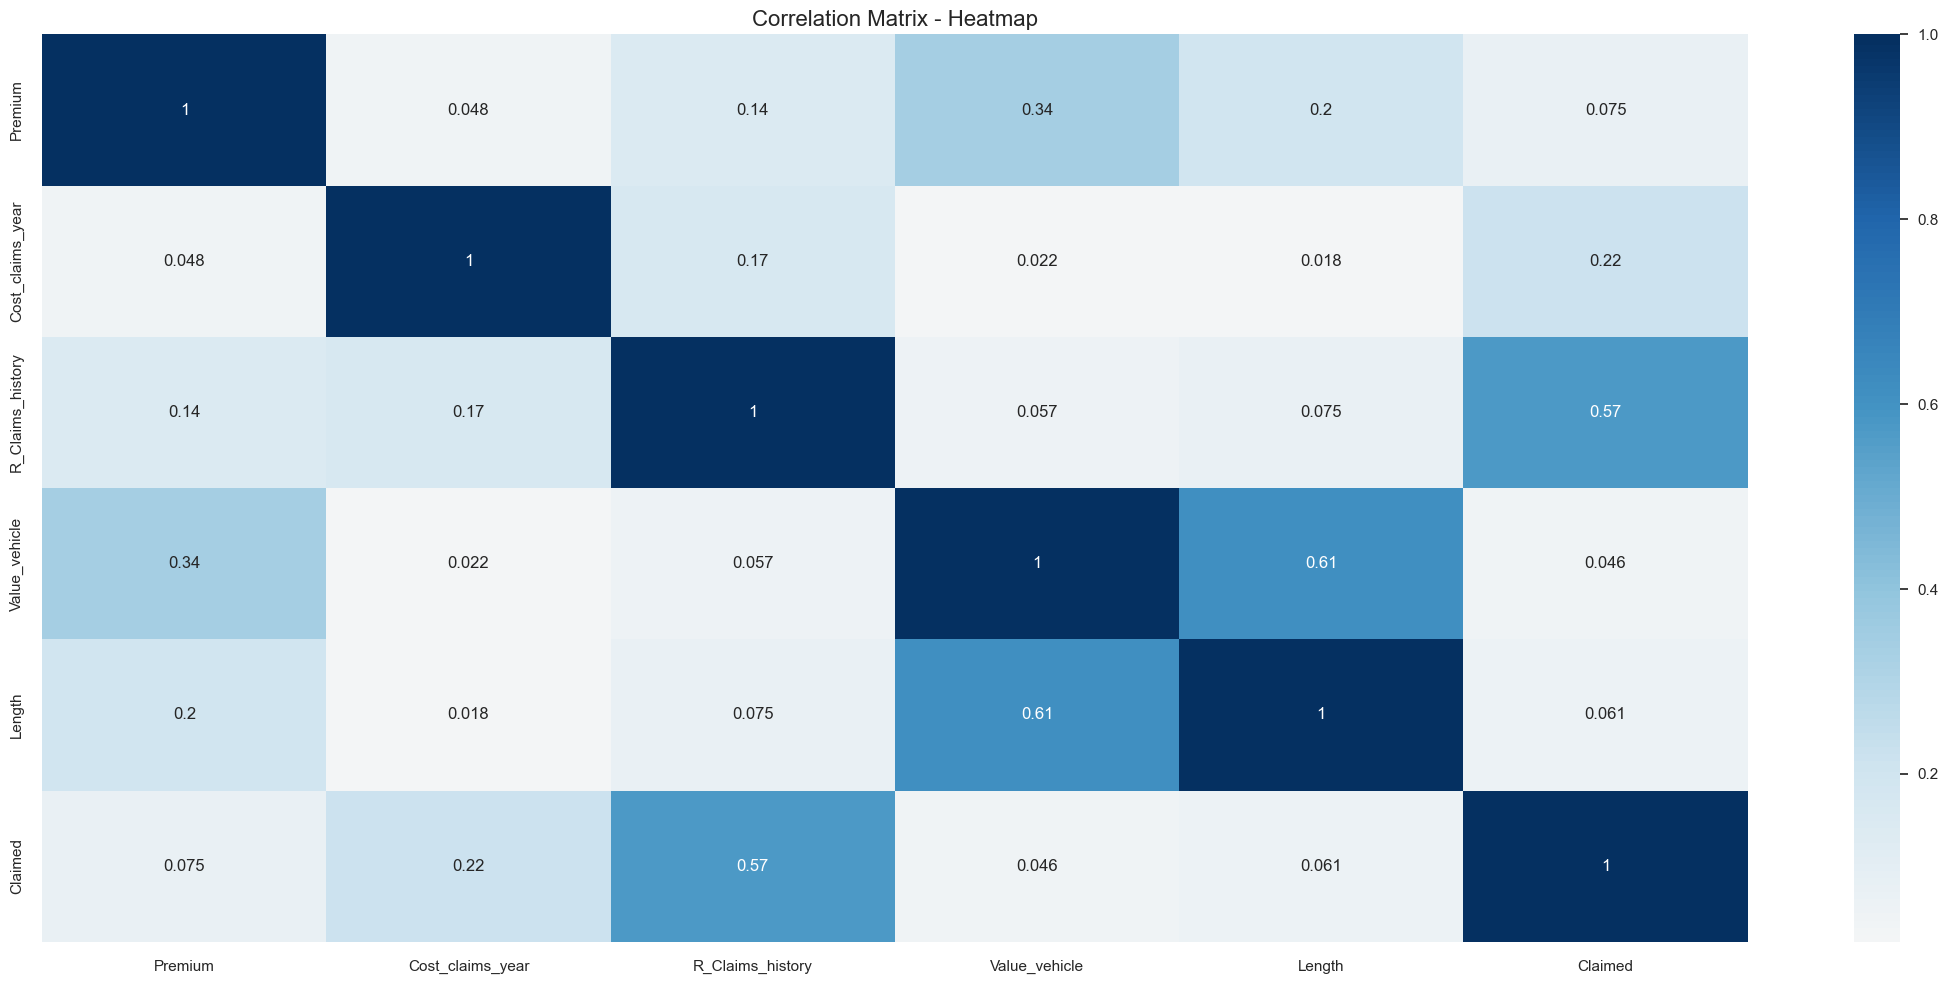

In [27]:
heatmap_corr(df_float)

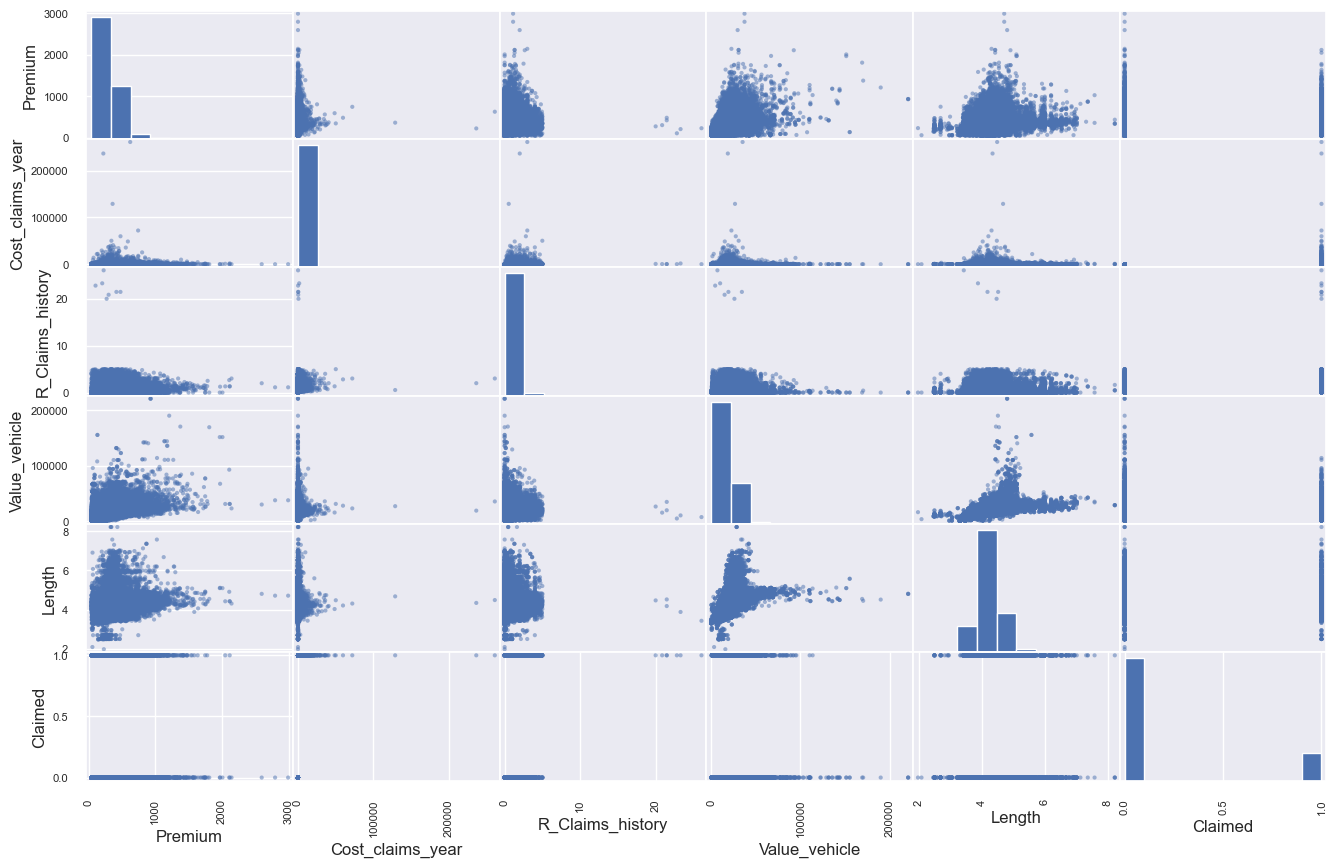

In [28]:
pd.plotting.scatter_matrix(df_float, figsize=[16, 10]);  

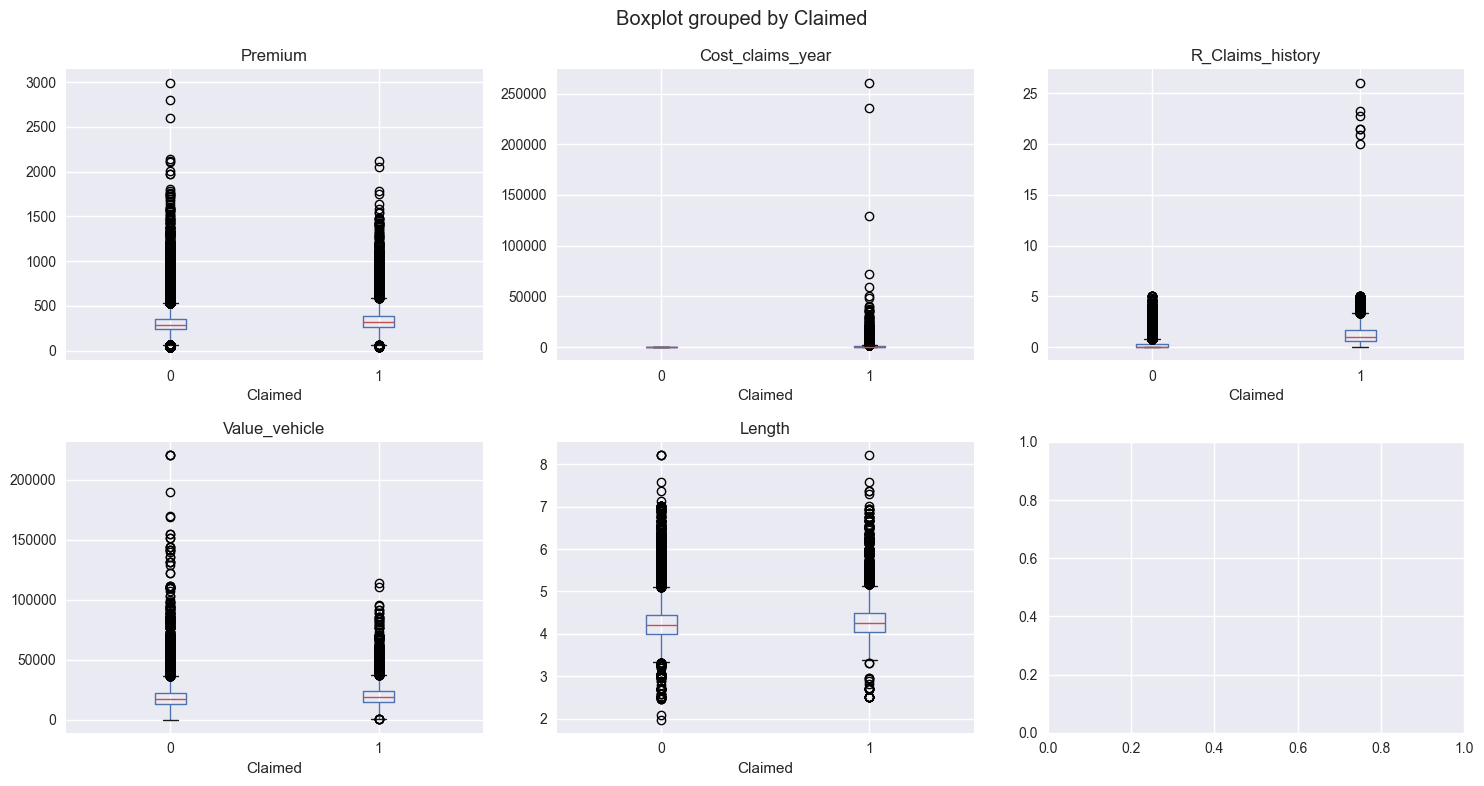

In [29]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))

ax = ax.flatten() # achata o array ax, transforma o array 2D (2 linhas x 3 colunas) em um array 1D - vetor (6 itens).
for i, col in enumerate(df_float.columns):
    if col == 'Claimed':
        continue
    df_float.boxplot(column=col, by='Claimed', ax=ax[i])
    ax[i].set_title(col)
plt.tight_layout()

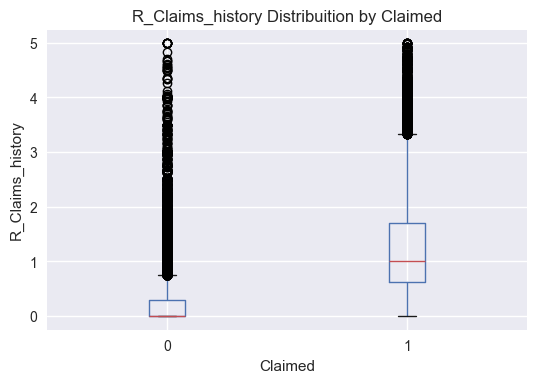

In [30]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(6, 4))

df_float[df_float['R_Claims_history'] < 5].boxplot(column='R_Claims_history', by='Claimed', ax=ax)
plt.suptitle('')
ax.set_title('R_Claims_history Distribuition by Claimed')
ax.set_ylabel('R_Claims_history');

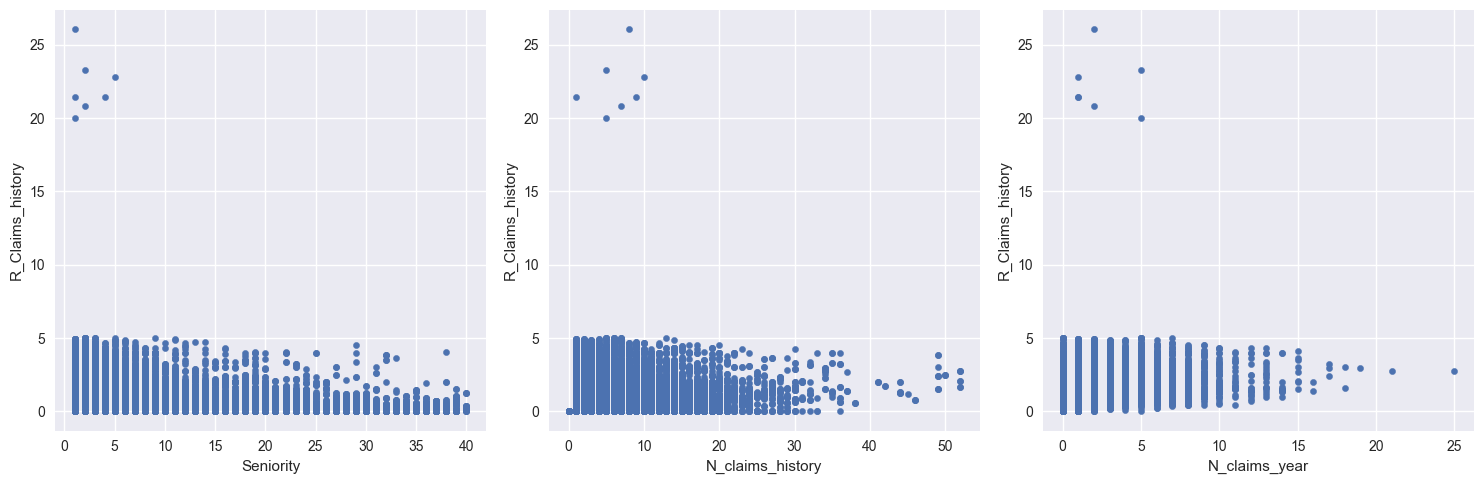

In [31]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(ncols = 3, figsize=(15, 5))

ax = ax.flatten()
df.plot(kind = 'scatter', x = 'Seniority', y = 'R_Claims_history', ax=ax[0])
df.plot(kind = 'scatter', x = 'N_claims_history', y = 'R_Claims_history', ax=ax[1])
df.plot(kind = 'scatter', x = 'N_claims_year', y = 'R_Claims_history', ax=ax[2])
plt.tight_layout()

In [32]:
#Replace outlier values for the ratio N_claims_history/Seniority, limited to 5. Values of R_Claims_history higher than 5 are outliers
mask = df['R_Claims_history'] > 5
df.loc[mask, 'R_Claims_history'] = np.minimum(df.loc[mask, 'N_claims_history'] / df.loc[mask, 'Seniority'], 5)

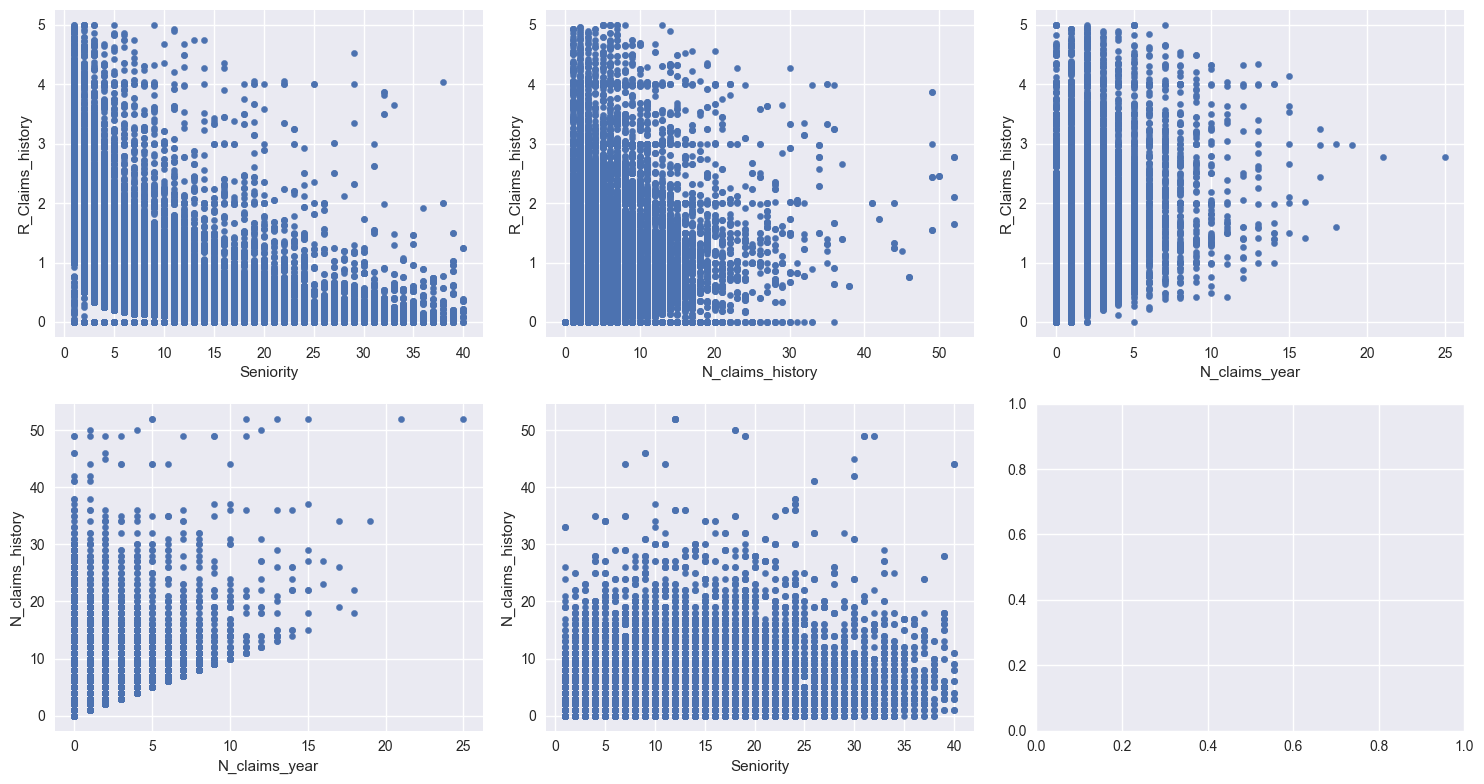

In [33]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))

ax = ax.flatten()
df.plot(kind = 'scatter', x = 'Seniority', y = 'R_Claims_history', ax=ax[0])
df.plot(kind = 'scatter', x = 'N_claims_history', y = 'R_Claims_history', ax=ax[1])
df.plot(kind = 'scatter', x = 'N_claims_year', y = 'R_Claims_history', ax=ax[2])
df.plot(kind = 'scatter', x = 'N_claims_year', y = 'N_claims_history', ax=ax[3])
df.plot(kind = 'scatter', x = 'Seniority', y = 'N_claims_history', ax=ax[4])
plt.tight_layout()

In [34]:
df[df['Type_fuel'].isna()].head(5)

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Age,Date_driving_licence,Time_drv_license,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Date_lapse,Payment,Premium,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Claimed
233,118,2014-09-01,2016-09-01,2017-09-01,1954-11-01,61,1973-11-01,42,0,6,2,2,2,0,2017-09-01,0,90.68,0.0,0,0,0.0,1,0,0,1980,0,124,3699.0,0,NaN,NaN,117,0
234,118,2014-09-01,2017-09-01,2018-09-01,1954-11-01,62,1973-11-01,43,0,6,2,2,2,1,2017-09-01,0,91.12,0.0,0,0,0.0,1,0,0,1980,0,124,3699.0,0,NaN,NaN,117,0
316,164,2014-12-01,2015-12-01,2016-12-01,1940-06-27,75,1968-10-01,47,1,5,1,1,1,0,2017-12-01,0,106.23,0.0,0,0,0.0,1,0,0,1988,0,200,3999.0,0,NaN,NaN,149,0
317,164,2014-12-01,2016-12-01,2017-12-01,1940-06-27,76,1968-10-01,48,1,5,1,1,1,0,2017-12-01,0,105.28,0.0,0,0,0.0,1,0,0,1988,0,200,3999.0,0,NaN,NaN,149,0
318,164,2014-12-01,2017-12-01,2018-12-01,1940-06-27,77,1968-10-01,49,1,5,1,1,1,1,2017-12-01,0,105.80,0.0,0,0,0.0,1,0,0,1988,0,200,3999.0,0,NaN,NaN,149,0


In [35]:
var_ct = pd.crosstab(index = df['Claimed'], columns = df['Type_fuel'])
var_ct = var_ct.sort_values(by=1, axis=1, ascending=False)
var_ct_perc = pd.crosstab(index = df['Claimed'], columns = df['Type_fuel'], normalize = 'columns')
var_ct_perc = var_ct_perc.sort_values(by=1, axis=1, ascending=False)
display(var_ct)
display(var_ct_perc)
anteil_diesel = (var_ct.iloc[:,0].sum() / (var_ct.iloc[:,0].sum() + var_ct.iloc[:,1].sum()))
anteil_diesel

Type_fuel,D,P
Claimed,,
0,51448,32844
1,13550,5949


Type_fuel,D,P
Claimed,,
0,0.791532,0.846648
1,0.208468,0.153352


np.float64(0.6262392693008064)

C:\Users\CLopes\AppData\Local\Temp\ipykernel_11516\995807917.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Type_fuel')['Claimed'].mean().sort_values(ascending=False).plot(kind = 'bar', color = colors, ax = ax[1])
C:\Users\CLopes\AppData\Local\Temp\ipykernel_11516\995807917.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[1].get_yticks()])
C:\Users\CLopes\AppData\Local\Temp\ipykernel_11516\995807917.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warnin

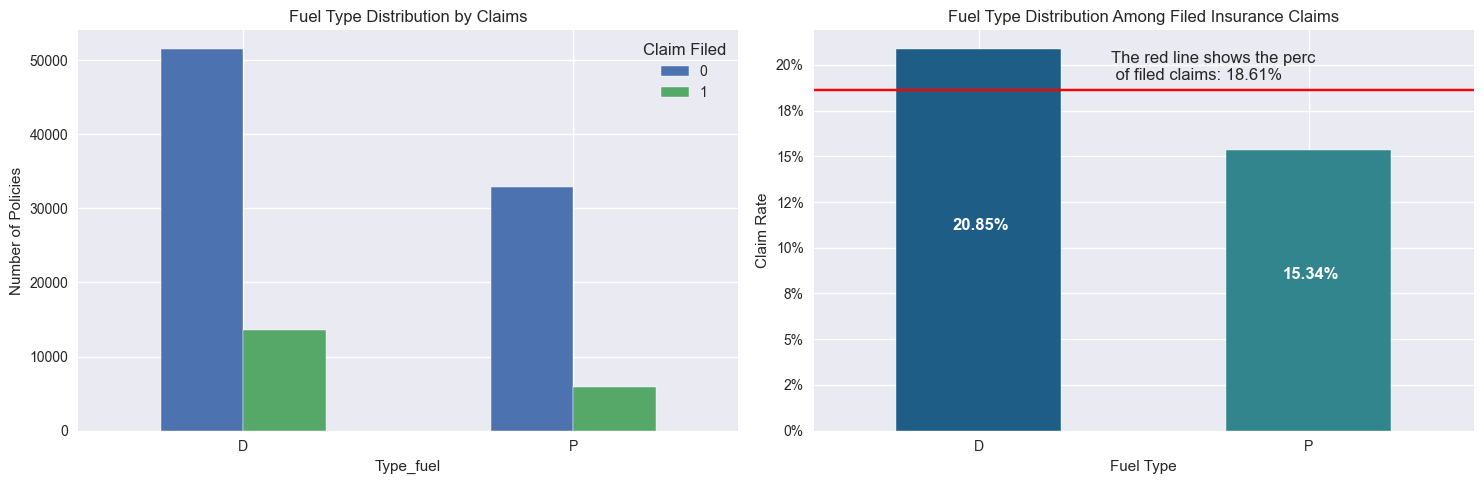

In [39]:
fig, ax = plt.subplots(ncols = 2, figsize=(15, 5))

var_ct = pd.crosstab(index = df['Type_fuel'], columns = df['Claimed'])
var_ct = var_ct.sort_values(by=1, ascending=False)
var_ct.plot(kind = 'bar', ax = ax[0])
ax[0].set(title = 'Fuel Type Distribution by Claims', xlabel = 'Type_fuel', ylabel = 'Number of Policies')
ax[0].legend(title='Claim Filed')
ax[0].xaxis.set_tick_params(labelrotation=0);
    
colors = sns.color_palette('crest', n_colors=len(df['Type_fuel'].unique()))[::-1] # Paleta invertida: mais escuro = maior incidência
df.groupby('Type_fuel')['Claimed'].mean().sort_values(ascending=False).plot(kind = 'bar', color = colors, ax = ax[1])
ax[1].set(title = 'Fuel Type Distribution Among Filed Insurance Claims', xlabel = 'Fuel Type', ylabel = 'Claim Rate')
ax[1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[1].get_yticks()])
ax[1].xaxis.set_tick_params(labelrotation=0)
ax[1].axhline(color='red', y = df['Claimed'].mean());
ax[1].text(transform=ax[1].transAxes, 
                     s = 'The red line shows the perc\n of filed claims: {}%'.format(round(df['Claimed'].mean()*100, 2)), x =0.45, y=0.875)
ax[1].text(transform=ax[1].transAxes, s = '{}%'.format(round(df.groupby('Type_fuel')['Claimed'].mean()[0]*100, 2)), x =0.21, y=0.5, 
           color = 'white', fontweight='bold')
ax[1].text(transform=ax[1].transAxes, s = '{}%'.format(round(df.groupby('Type_fuel')['Claimed'].mean()[1]*100, 2)), x =0.71, y=0.38, 
           color = 'white', fontweight='bold')
    
plt.tight_layout()
fig.savefig('graph_bar_fuel_type.png')

In [37]:
import statsmodels.api as sm

X = df[['N_claims_history', 'R_Claims_history', 'Policies_in_force', 'Seniority', 'Time_drv_license', 'Age']]
y = df['Claimed']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.320758
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Claimed   No. Observations:               105555
Model:                          Logit   Df Residuals:                   105548
Method:                           MLE   Df Model:                            6
Date:                Wed, 12 Nov 2025   Pseudo R-squ.:                  0.3325
Time:                        09:09:05   Log-Likelihood:                -33858.
converged:                       True   LL-Null:                       -50724.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.8500      0.051    -55.716      0.000      -2.950      -2.750
N_claims

In [38]:
print(os.getcwd())

c:\Users\CLopes\05_Portfolio_Projekt\Portfolio_Versicherung\notebooks
